In [21]:
import pickle
import pandas as pd
import numpy as np
import sqlalchemy
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import metrics

## The code for linear regression and decision tree model was written using the source below 
## https://github.com/MohamedEl1/Dublin-bikes-web-app/blob/master/Data%20Analytics/machine_learning%20.ipynb

In [51]:
weather_db = pd.read_csv("weather.csv", index_col = 0)
availability_db = pd.read_csv("avail.csv")

In [52]:
weather_db = pd.read_csv("weather.csv")
availability_db = pd.read_csv("avail.csv", index_col = 0)


weather_db["id"] = range(len(weather_db))


weather_db.head(5)


,time,cord_long,cord_lat,weather_main,main_temp,main_humidity,wind_speed,wind_degree,sys_sunset,sys_sunrise,id
0,2023-03-30 13:53:20,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,0
1,2023-03-30 13:55:03,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,1
2,2023-03-30 14:11:04,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,2
3,2023-03-30 14:11:26,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,3
4,2023-03-30 14:15:02,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,4


In [53]:
availability_db = availability_db.rename(columns={"number": "id"})

In [54]:
availability_db.head(5)


,available_bikes,last_update,id
available_bike_stands,,,
23,7,2147483647,42
14,6,2147483647,30
21,12,2147483647,54
21,14,2147483647,108
14,16,2147483647,20


In [55]:

availability_db = availability_db.reset_index()

In [56]:
availability_db.head(5)

,available_bike_stands,available_bikes,last_update,id
0,23,7,2147483647,42
1,14,6,2147483647,30
2,21,12,2147483647,54
3,21,14,2147483647,108
4,14,16,2147483647,20


In [57]:
dummy_fields = ["weather_main"]
for weather in dummy_fields:
    dummies = pd.get_dummies(weather_db[weather], prefix=weather, drop_first=False)
    weather_db = pd.concat([weather_db, dummies], axis=1)
    
weather_db.head(5)

,time,cord_long,cord_lat,weather_main,main_temp,main_humidity,wind_speed,wind_degree,sys_sunset,sys_sunrise,id,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Mist,weather_main_Rain
0,2023-03-30 13:53:20,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,0,0,1,0,0,0
1,2023-03-30 13:55:03,-6.2672,53.344,Clouds,14.61,71,4.12,220,2023-03-30 18:54:48,2023-03-30 06:04:13,1,0,1,0,0,0
2,2023-03-30 14:11:04,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,2,0,1,0,0,0
3,2023-03-30 14:11:26,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,3,0,1,0,0,0
4,2023-03-30 14:15:02,-6.2672,53.344,Clouds,14.95,72,4.92,149,2023-03-30 18:54:48,2023-03-30 06:04:13,4,0,1,0,0,0


In [58]:
weather_db.to_csv("weather1.csv")
weather_1 = pd.read_csv("weather1.csv")

In [59]:
X = pd.merge(weather_1, availability_db, on="id")[["weather_main_Rain", "main_temp", "main_humidity"]]
y = pd.merge(weather_1, availability_db, on="id")[["id", "available_bikes"]]


In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [61]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared score/Accuracy score: {r2}")


R-squared score/Accuracy score: 0.41184967772498954


In [62]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.300606506899646
Mean Squared Error: 150.8893299946107
Root Mean Squared Error: 12.283701803390162


## decision tree

In [63]:
X = pd.merge(weather_1, availability_db, on="id")[["weather_main_Rain", "main_temp", "main_humidity"]]
y = pd.merge(weather_1, availability_db, on="id")[["id", "available_bikes"]]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


model = DecisionTreeClassifier(max_depth =3, random_state =0)


model.fit(X_train, y_train[["available_bikes"]])

predictions = model.predict(X_test)

In [65]:
X_train

,weather_main_Rain,main_temp,main_humidity
386,0,10.99,92
694,0,8.15,87
965,0,11.19,70
351,0,10.99,92
749,0,10.74,82
...,...,...,...
47,0,14.95,72
62,0,15.29,72
277,0,10.37,91
131,0,14.92,65


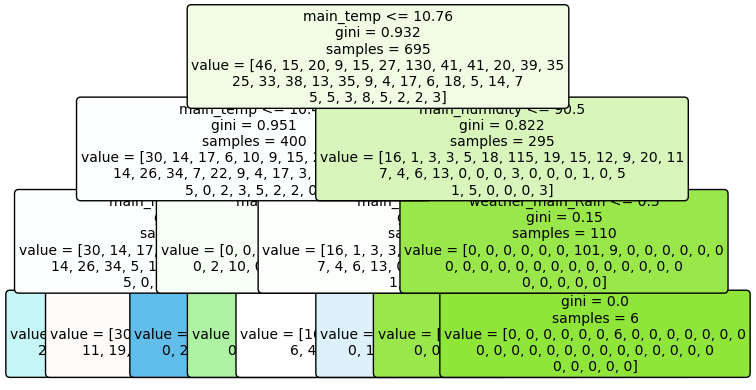

In [66]:
feature_names = X_train.columns
a = tree.plot_tree(model,

                   feature_names = feature_names,

                   rounded = True,

                   filled = True,

                   fontsize=10)

plt.show()

In [67]:
X_test

,weather_main_Rain,main_temp,main_humidity
380,0,10.99,92
847,0,6.34,84
970,0,11.19,70
824,0,6.84,84
632,0,9.22,91
...,...,...,...
761,0,11.66,74
982,0,8.99,78
318,0,10.99,92
547,1,8.78,95


In [68]:
y_test.iloc[3:4]

,id,available_bikes
824,95,8


In [69]:
sample = X_test.iloc[3:4]

In [70]:
model.predict(sample)

array([0])

In [71]:
X_test.iloc[3:4]

,weather_main_Rain,main_temp,main_humidity
824,0,6.84,84


In [72]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ("R-squared score/Accuracy score : ",metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 22.593482676149772
Mean Squared Error: 1129.4974513381987
Root Mean Squared Error: 33.60799683614301
R-squared score/Accuracy score :  -0.5491444503233771
